In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler



In [2]:
df = pd.read_csv('FINAL_USO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [4]:
gold_data = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [5]:
gold_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100


In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1718 non-null   object 
 1   Open       1718 non-null   float64
 2   High       1718 non-null   float64
 3   Low        1718 non-null   float64
 4   Close      1718 non-null   float64
 5   Adj Close  1718 non-null   float64
 6   Volume     1718 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 94.1+ KB


<AxesSubplot:>

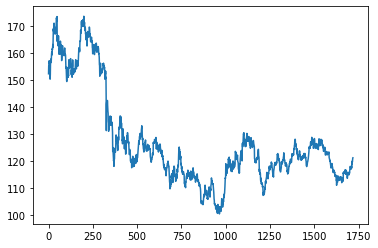

In [7]:
gold_data['Adj Close'].plot()

In [9]:
data = gold_data['Adj Close'].values
data

array([152.330002, 155.229996, 154.869995, ..., 120.57    , 121.059998,
       121.25    ])

In [10]:
data = data.reshape(-1,1)
data

array([[152.330002],
       [155.229996],
       [154.869995],
       ...,
       [120.57    ],
       [121.059998],
       [121.25    ]])

In [11]:
train = data[:data.shape[0]-50]
test = data[len(train):]

In [14]:
train.shape

(1668, 1)

In [15]:
test.shape

(50, 1)

In [16]:
scaller = MinMaxScaler(feature_range=(0,1))
train_scalled = scaller.fit_transform(train)
train_scalled

array([[0.70893176],
       [0.74859794],
       [0.74367384],
       ...,
       [0.2120093 ],
       [0.20927374],
       [0.20913693]])

In [17]:
X_train , y_train = [] , []
timesteps = 50

for i in range (timesteps, train_scalled.shape[0]):
    X_train.append(train_scalled[i-timesteps:i,0])
    y_train.append(train_scalled[i,0])


In [18]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [19]:
X_train.shape

(1618, 50)

In [21]:
y_train.shape

(1618,)